In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#loading the house pricing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.keys()
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [3]:
dataset = pd.DataFrame(housing.data,columns=housing.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
dataset['Price']=housing.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [7]:
#Exploratory Data Analysis EDA
dataset.corr()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [8]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [11]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [12]:
X_train
X_test

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])

In [13]:
#model training
from sklearn.linear_model import LinearRegression

In [14]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
print(regression.coef_)
print(regression.intercept_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]
2.0692396089424165


In [16]:
##Prediction with test data
prediction = regression.predict(X_test)
prediction

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

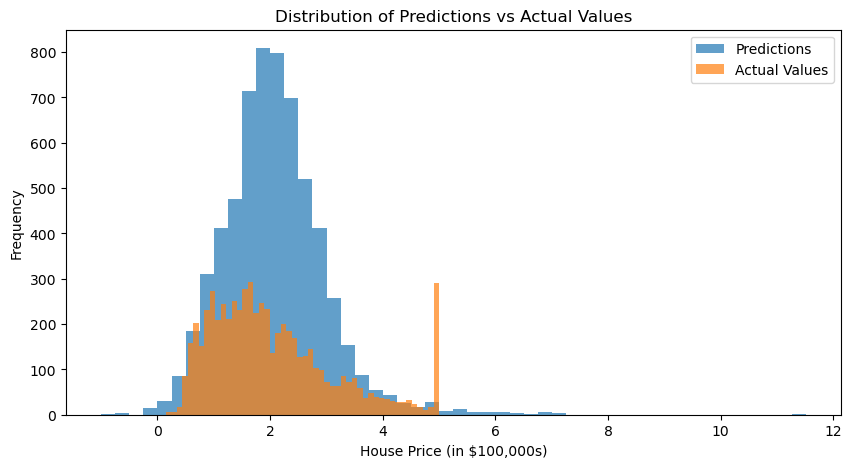

Prediction min: -1.0005102052581978 max: 11.507401374151181
Actual min: 0.14999 max: 5.00001


In [28]:
# Visualize prediction distribution and compare with actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(prediction, bins=50, alpha=0.7, label='Predictions')
plt.hist(y_test, bins=50, alpha=0.7, label='Actual Values')
plt.legend()
plt.title('Distribution of Predictions vs Actual Values')
plt.xlabel('House Price (in $100,000s)')
plt.ylabel('Frequency')
plt.show()
print('Prediction min:', prediction.min(), 'max:', prediction.max())
print('Actual min:', y_test.min(), 'max:', y_test.max())

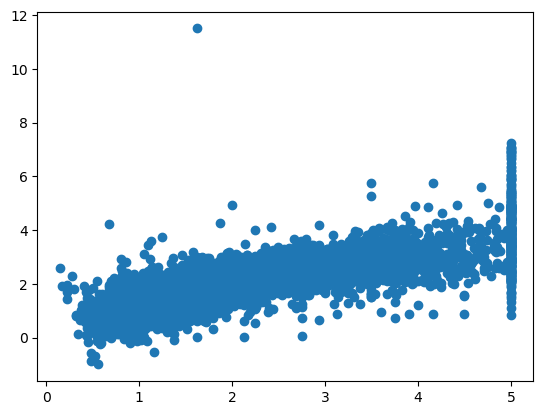

In [17]:
##scatter plot for predictions
prediction_plot=plt.scatter(y_test,prediction)
plt.show(prediction_plot)

In [18]:
residuals= y_test-prediction
residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Price, Length: 6192, dtype: float64

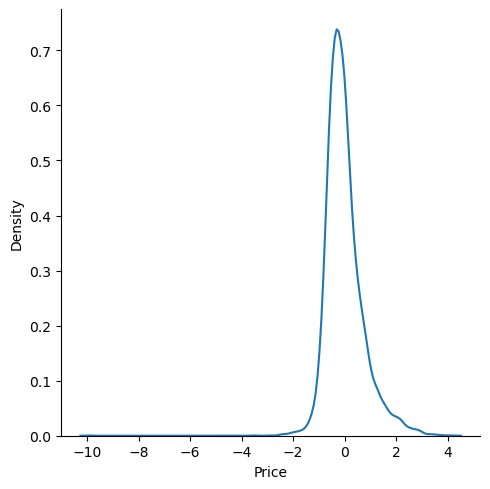

In [19]:
##plotting error 
import seaborn as sns

errors=sns.displot(residuals,kind="kde")
plt.show(errors)

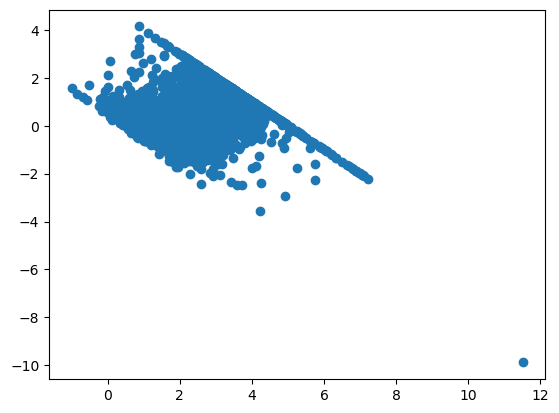

In [20]:
##scatter plot with respect to predictions and errors
pred_red=plt.scatter(prediction,residuals)
plt.show(pred_red)

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,prediction))
print(mean_squared_error(y_test,prediction))
print(np.sqrt(mean_squared_error(y_test,prediction)))
y_pred_baseline = np.full_like(y_test, np.mean(y_test))
print("Baseline MAE:", mean_absolute_error(y_test, y_pred_baseline))

0.5272474538305953
0.5305677824766754
0.7284008391515453
Baseline MAE: 0.9057872985251455


In [22]:
# R square and adjusted R square 
from sklearn.metrics import r2_score
score= r2_score(y_test,prediction)
print(score)
n = len(y_test)        # Number of observations
p = X_test.shape[1]    # Number of features (predictors)

adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")


0.5957702326061662
Adjusted R-squared: 0.5952472117200025


In [23]:
housing.data[0].reshape(1,-1)
scaler.transform(housing.data[0].reshape(1,-1))


c:\Users\ritesh.chourasiya\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [24]:
regression.predict(scaler.transform(housing.data[0].reshape(1,-1)))

c:\Users\ritesh.chourasiya\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

In [25]:
import pickle


In [26]:
with open('regression_model.pkl','wb') as f:
    pickle.dump(regression,f)

In [30]:
with open('regression_model.pkl','rb') as f:
    pickled_model=pickle.load(f)
input_features = [0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671] 
input_array = np.array(input_features).reshape(1, -1)
prediction = pickled_model.predict(input_array)

print("Prediction:", prediction[0])
pickled_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

Prediction: -75.13332100885778


c:\Users\ritesh.chourasiya\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])